# Phase 4: Clustering

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning:

Looking at all the given data that is the csv files and merging only data required for our analysis to form a  final dataframe

In [69]:
district_crimes=pd.read_csv(r"india_crimes/01_District_wise_crimes_committed_IPC_2001_2012.csv")
district_crimes

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [70]:
district_crimes.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [71]:
# total murders
district_crimes['TOTAL MURDERS']=district_crimes[['MURDER', 'ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']].sum(axis=1)
district_crimes=district_crimes.drop(columns=['MURDER', 'ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'])

# total rapes
district_crimes['TOTAL RAPES']=district_crimes[['RAPE', 'CUSTODIAL RAPE','OTHER RAPE']].sum(axis=1)
district_crimes=district_crimes.drop(columns=['RAPE', 'CUSTODIAL RAPE','OTHER RAPE'])

# total kidnappings
district_crimes['TOTAL KIDNAPPINGS']=district_crimes[['KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS']].sum(axis=1)
district_crimes=district_crimes.drop(columns=['KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS'])

# total theft
district_crimes['TOTAL ROBERRY/THEFT']=district_crimes[['DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT','AUTO THEFT', 'OTHER THEFT']].sum(axis=1)
district_crimes=district_crimes.drop(columns=['DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT','AUTO THEFT', 'OTHER THEFT'])

# total fraud
district_crimes['TOTAL CHEATING/FRAUD']=district_crimes[['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING']].sum(axis=1)
district_crimes=district_crimes.drop(columns=['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING'])

#total crimes against women
district_crimes['TOTAL CRIME AGAINST WOMEN/GIRLS']=district_crimes[['DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']].sum(axis=1)
district_crimes=district_crimes.drop(columns=['DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'])

district_crimes.head()

,STATE/UT,DISTRICT,YEAR,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,TOTAL KIDNAPPINGS,TOTAL ROBERRY/THEFT,TOTAL CHEATING/FRAUD,TOTAL CRIME AGAINST WOMEN/GIRLS
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,100,92,646,121,374
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,46,106,947,84,303
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,54,118,1701,251,395
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,40,50,449,51,238
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,46,98,2508,273,426


In [72]:
district_crimes.shape

(9017, 15)

In [73]:
district_crimes_sc = pd.read_csv(r"india_crimes/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
district_crimes_sc

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [74]:
district_crimes_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [75]:
district_crimes_sc['TOTAL CRIMES AGAINST SC']=district_crimes_sc.iloc[:,3:].sum(axis=1)

In [76]:
district_crimes_sc_total=district_crimes_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]
district_crimes_sc_total

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1
9016,PUDUCHERRY,PUDUCHERRY,2012,23


In [77]:
district_crimes_st=pd.read_csv(r"india_crimes/02_District_wise_crimes_committed_against_ST_2001_2012.csv")
district_crimes_st

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [78]:
district_crimes_st['TOTAL CRIMES AGAINST ST']=district_crimes_st.iloc[:,3:].sum(axis=1)

In [79]:
district_crimes_st_total=district_crimes_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]
district_crimes_st_total

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0


In [80]:
district_crimes_children=pd.read_csv(r"india_crimes/03_District_wise_crimes_committed_against_children_2001_2012.csv")
district_crimes_children

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [81]:
district_crimes_children.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [82]:
district_crimes_children.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [83]:
district_crimes_children_total=district_crimes_children[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]
district_crimes_children_total

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9011,LAKSHADWEEP,TOTAL,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7
9013,PUDUCHERRY,PUDUCHERRY,2012,25


In [84]:
district_crimes_juvenile=pd.read_csv(r"india_crimes/08_01_Juvenile_apprehended_state_IPC_2001_2010.csv")
district_crimes_juvenile

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,Grand total
0,Andhra Pradesh,2001,Murder,3,0,7,0,5,0,15,0,15
1,Andhra Pradesh,2001,Attempt to Commit Murder,2,0,0,0,11,0,13,0,13
2,Andhra Pradesh,2001,C H Not amounting to Murder,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,Rape,2,0,15,0,2,1,19,1,20
4,Andhra Pradesh,2001,Custodial Rape,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,Puducherry,2010,Cruelty by Husband or Relatives,0,0,0,0,0,0,0,0,0
10496,Puducherry,2010,Importation of girls from Foreign Countr,0,0,0,0,0,0,0,0,0
10497,Puducherry,2010,Causing death by negligence,0,0,0,0,0,0,0,0,0
10498,Puducherry,2010,Other IPC Crimes,0,0,1,0,2,3,3,3,6


In [85]:
district_crimes_juvenile['STATE/UT'] = district_crimes_juvenile['STATE/UT'].str.upper()

In [86]:
district_crimes_juvenile.set_index(['STATE/UT','Year'],inplace=True)

In [87]:
district_crimes_juvenile=district_crimes_juvenile.groupby(['STATE/UT','Year']).sum()

In [88]:
district_crimes_juvenile=district_crimes_juvenile.reset_index()

In [89]:
district_crimes_juvenile.rename(columns={"Grand total":"TOTAL JUVENILE CRIMES"},inplace=True)
district_crimes_juvenile

,STATE/UT,Year,CRIME,Boys 7-12 Years,Girls 7-12 Years,Boys 12-16 Years,Girls 12-16 Years,Boys 16-18 Years,Girls 16-18 Years,Total for boys all Age Groups,Total for girls all Age Groups,TOTAL JUVENILE CRIMES
0,A&N ISLANDS,2001,MurderAttempt to Commit MurderC H Not amountin...,0,0,16,6,10,0,26,6,32
1,A&N ISLANDS,2002,MurderAttempt to Commit MurderC H Not amountin...,0,0,8,0,5,0,13,0,13
2,A&N ISLANDS,2003,MurderAttempt to Commit MurderC H Not amountin...,0,0,0,0,6,12,6,12,18
3,A&N ISLANDS,2004,MurderAttempt to Commit MurderC H Not amountin...,0,0,0,2,25,0,25,2,27
4,A&N ISLANDS,2005,MurderAttempt to Commit MurderC H Not amountin...,4,0,17,0,3,0,24,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
345,WEST BENGAL,2006,MurderAttempt to Commit MurderC H Not amountin...,6,0,112,9,152,9,270,18,288
346,WEST BENGAL,2007,MurderAttempt to Commit MurderC H Not amountin...,15,0,139,13,89,2,243,15,258
347,WEST BENGAL,2008,MurderAttempt to Commit MurderC H Not amountin...,38,0,154,5,1235,15,1427,20,1447
348,WEST BENGAL,2009,MurderAttempt to Commit MurderC H Not amountin...,25,2,96,24,239,15,360,41,401


In [90]:
district_crimes_juvenile_total = district_crimes_juvenile[['STATE/UT', 'Year', 'TOTAL JUVENILE CRIMES']]
district_crimes_juvenile_total


,STATE/UT,Year,TOTAL JUVENILE CRIMES
0,A&N ISLANDS,2001,32
1,A&N ISLANDS,2002,13
2,A&N ISLANDS,2003,18
3,A&N ISLANDS,2004,27
4,A&N ISLANDS,2005,24
...,...,...,...
345,WEST BENGAL,2006,288
346,WEST BENGAL,2007,258
347,WEST BENGAL,2008,1447
348,WEST BENGAL,2009,401


In [91]:
district_crimes_againstpolice=pd.read_csv(r"india_crimes/13_Police_killed_or_injured_on_duty2001_2010.csv")
district_crimes_againstpolice

,Area_Name,Year,Group_Name,Sub_Group_Name,Police_Injured_By_Criminals,Police_Injured_By_Riotous_Mobs,Police_Injured_In_Accidents,Police_Injured_In_Dacoity_OperationsOther_raids,Police_Injured_In_TerroristsExtremists_Operations,Police_Injured_On_Border_Duties,Police_Injured_Total_Policemen,Police_Killed_By_Criminals,Police_Killed_By_Riotous_Mobs,Police_Killed_In_Accidents,Police_Killed_In_Dacoity_OperationsOther_raids,Police_Killed_In_TerroristsExtremists_Operations,Police_Killed_On_Border_Duties,Police_Killed_Total_Policemen
0,Andaman & Nicobar Islands,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,3,4,1,3,0,11,0,0,2,0,3,0,5
2,Arunachal Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Assam,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4,Bihar,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,1,0,0,0,2,0,3,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Tamil Nadu,2010,Police - Total,7. Total Police Killed or Injured,10,26,142,4,0,0,182,2,0,65,0,0,0,67
2446,Tripura,2010,Police - Total,7. Total Police Killed or Injured,0,0,0,0,2,0,2,0,0,0,0,0,2,2
2447,Uttar Pradesh,2010,Police - Total,7. Total Police Killed or Injured,6,10,9,10,0,8,43,2,1,101,0,0,1,105
2448,Uttarakhand,2010,Police - Total,7. Total Police Killed or Injured,0,0,5,0,0,0,5,0,0,15,0,0,0,15


In [92]:
district_crimes_againstpolice.rename(columns={"Area_Name": "STATE/UT", "Police_Killed_Total_Policemen": "TOTAL POLICEMEN KILLED"}, inplace=True)
district_crimes_againstpolice

,STATE/UT,Year,Group_Name,Sub_Group_Name,Police_Injured_By_Criminals,Police_Injured_By_Riotous_Mobs,Police_Injured_In_Accidents,Police_Injured_In_Dacoity_OperationsOther_raids,Police_Injured_In_TerroristsExtremists_Operations,Police_Injured_On_Border_Duties,Police_Injured_Total_Policemen,Police_Killed_By_Criminals,Police_Killed_By_Riotous_Mobs,Police_Killed_In_Accidents,Police_Killed_In_Dacoity_OperationsOther_raids,Police_Killed_In_TerroristsExtremists_Operations,Police_Killed_On_Border_Duties,TOTAL POLICEMEN KILLED
0,Andaman & Nicobar Islands,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,3,4,1,3,0,11,0,0,2,0,3,0,5
2,Arunachal Pradesh,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Assam,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4,Bihar,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,1,0,0,0,2,0,3,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Tamil Nadu,2010,Police - Total,7. Total Police Killed or Injured,10,26,142,4,0,0,182,2,0,65,0,0,0,67
2446,Tripura,2010,Police - Total,7. Total Police Killed or Injured,0,0,0,0,2,0,2,0,0,0,0,0,2,2
2447,Uttar Pradesh,2010,Police - Total,7. Total Police Killed or Injured,6,10,9,10,0,8,43,2,1,101,0,0,1,105
2448,Uttarakhand,2010,Police - Total,7. Total Police Killed or Injured,0,0,5,0,0,0,5,0,0,15,0,0,0,15


In [93]:
district_crimes_againstpolice['STATE/UT'] = district_crimes_againstpolice['STATE/UT'].str.upper()
district_crimes_againstpolice

,STATE/UT,Year,Group_Name,Sub_Group_Name,Police_Injured_By_Criminals,Police_Injured_By_Riotous_Mobs,Police_Injured_In_Accidents,Police_Injured_In_Dacoity_OperationsOther_raids,Police_Injured_In_TerroristsExtremists_Operations,Police_Injured_On_Border_Duties,Police_Injured_Total_Policemen,Police_Killed_By_Criminals,Police_Killed_By_Riotous_Mobs,Police_Killed_In_Accidents,Police_Killed_In_Dacoity_OperationsOther_raids,Police_Killed_In_TerroristsExtremists_Operations,Police_Killed_On_Border_Duties,TOTAL POLICEMEN KILLED
0,ANDAMAN & NICOBAR ISLANDS,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ANDHRA PRADESH,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,3,4,1,3,0,11,0,0,2,0,3,0,5
2,ARUNACHAL PRADESH,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ASSAM,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,0,0,0,0,1,0,1,0,0,1,0,0,0,1
4,BIHAR,2001,Police - Assistant Sub-Inspectors,3. Assistant Sub-Inspectos,1,0,0,0,2,0,3,0,0,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,TAMIL NADU,2010,Police - Total,7. Total Police Killed or Injured,10,26,142,4,0,0,182,2,0,65,0,0,0,67
2446,TRIPURA,2010,Police - Total,7. Total Police Killed or Injured,0,0,0,0,2,0,2,0,0,0,0,0,2,2
2447,UTTAR PRADESH,2010,Police - Total,7. Total Police Killed or Injured,6,10,9,10,0,8,43,2,1,101,0,0,1,105
2448,UTTARAKHAND,2010,Police - Total,7. Total Police Killed or Injured,0,0,5,0,0,0,5,0,0,15,0,0,0,15


In [94]:
district_crimes_againstpolice.set_index(['STATE/UT','Year'],inplace=True)

In [95]:
district_crimes_againstpolice=district_crimes_againstpolice.groupby(['STATE/UT','Year']).sum()

In [96]:
district_crimes_againstpolice=district_crimes_againstpolice.reset_index()

In [97]:
district_crimes_againstpolice_policekilled_total=district_crimes_againstpolice[['STATE/UT','Year','TOTAL POLICEMEN KILLED']]
district_crimes_againstpolice_policekilled_total

,STATE/UT,Year,TOTAL POLICEMEN KILLED
0,ANDAMAN & NICOBAR ISLANDS,2001,0
1,ANDAMAN & NICOBAR ISLANDS,2002,0
2,ANDAMAN & NICOBAR ISLANDS,2003,0
3,ANDAMAN & NICOBAR ISLANDS,2004,6
4,ANDAMAN & NICOBAR ISLANDS,2005,0
...,...,...,...
345,WEST BENGAL,2006,50
346,WEST BENGAL,2007,22
347,WEST BENGAL,2008,32
348,WEST BENGAL,2009,44


In [98]:
district_crimes_againstwomen=pd.read_csv(r"india_crimes/42_District_wise_crimes_committed_against_women_2001_2012.csv")
district_crimes_againstwomen

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [99]:
district_crimes_againstwomen['TOTAL CRIMES AGAINST WOMEN']=district_crimes_againstwomen.iloc[:,3:].sum(axis=1)

In [100]:
district_crimes_againstwomen_total=district_crimes_againstwomen[['STATE/UT','Year','DISTRICT','TOTAL CRIMES AGAINST WOMEN']]
district_crimes_againstwomen_total

,STATE/UT,Year,DISTRICT,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,2001,ADILABAD,454
1,ANDHRA PRADESH,2001,ANANTAPUR,356
2,ANDHRA PRADESH,2001,CHITTOOR,456
3,ANDHRA PRADESH,2001,CUDDAPAH,278
4,ANDHRA PRADESH,2001,EAST GODAVARI,475
...,...,...,...,...
9012,LAKSHADWEEP,2012,LAKSHADWEEP,2
9013,LAKSHADWEEP,2012,TOTAL,2
9014,PUDUCHERRY,2012,KARAIKAL,11
9015,PUDUCHERRY,2012,PUDUCHERRY,35


<B> MERGING THE ABOVE DATASETS!!<BR>

In [101]:
district_crimes.rename(columns={"YEAR":"Year"},inplace=True)

In [102]:
data=pd.merge(district_crimes,district_crimes_sc)
data

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,...,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,78,30,1131,181,1518,4154,178,...,1,4,0,0,0,3,0,15,32,55
1,ANDHRA PRADESH,ANANTAPUR,2001,168,69,1543,270,754,4125,277,...,4,0,0,0,0,49,21,0,53,127
2,ANDHRA PRADESH,CHITTOOR,2001,156,38,2088,404,1262,5818,160,...,3,0,0,0,0,38,36,0,34,114
3,ANDHRA PRADESH,CUDDAPAH,2001,164,23,795,233,1181,3140,134,...,3,0,0,0,0,20,52,0,25,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,70,41,1244,431,2313,6507,150,...,3,0,0,0,0,3,12,63,7,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,LAKSHADWEEP,LAKSHADWEEP,2012,10,3,3,0,32,60,0,...,0,0,0,0,0,0,0,0,0,0
8822,LAKSHADWEEP,TOTAL,2012,10,3,3,0,32,60,0,...,0,0,0,0,0,0,0,0,0,0
8823,PUDUCHERRY,KARAIKAL,2012,17,1,186,44,392,787,13,...,0,0,0,0,0,0,0,0,0,1
8824,PUDUCHERRY,PUDUCHERRY,2012,109,20,632,219,1668,3494,55,...,0,0,0,0,0,0,1,20,1,23


In [103]:
data1=pd.merge(data,district_crimes_st)
data1

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,...,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TOTAL CRIMES AGAINST SC,Kidnapping Abduction,Other Crimes Against STs,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,GUNTAKAL RLY.,2001,1,0,1,4,104,287,4,...,0,0,0,0,0,0,0,0,0,0
1,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,1,0,17,6,68,439,6,...,0,0,0,0,0,0,0,0,0,0
2,ARUNACHAL PRADESH,KAMENG EAST,2001,0,1,36,0,28,126,4,...,0,0,0,0,0,0,0,0,0,0
3,ARUNACHAL PRADESH,KAMENG WEST,2001,0,0,27,0,30,103,6,...,0,0,0,0,0,0,0,0,0,0
4,ARUNACHAL PRADESH,SUBANSIRI LOWER,2001,5,2,11,0,44,148,19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,DAMAN & DIU,DAMAN,2012,6,10,15,29,34,202,7,...,0,0,0,0,0,0,0,0,0,0
1924,DAMAN & DIU,DIU,2012,3,1,2,9,12,37,1,...,0,0,0,0,0,0,0,0,0,0
1925,DAMAN & DIU,TOTAL,2012,9,11,17,38,46,239,8,...,0,0,0,0,0,0,0,0,0,0
1926,LAKSHADWEEP,LAKSHADWEEP,2012,10,3,3,0,32,60,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
data2=pd.merge(data1,district_crimes_children)
data2

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,...,TOTAL CRIMES AGAINST ST,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,GUNTAKAL RLY.,2001,1,0,1,4,104,287,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,1,0,17,6,68,439,6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,ARUNACHAL PRADESH,KAMENG EAST,2001,0,1,36,0,28,126,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ARUNACHAL PRADESH,KAMENG WEST,2001,0,0,27,0,30,103,6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ARUNACHAL PRADESH,SUBANSIRI LOWER,2001,5,2,11,0,44,148,19,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,WEST BENGAL,SEALDAH G.R.P.,2012,13,0,62,0,39,657,30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1230,WEST BENGAL,SILIGURI G.R.P.,2012,2,0,0,0,58,248,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1231,DAMAN & DIU,DIU,2012,3,1,2,9,12,37,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1232,LAKSHADWEEP,LAKSHADWEEP,2012,10,3,3,0,32,60,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [105]:
data3=pd.merge(data2,district_crimes_juvenile_total)

data3

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,...,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES
0,ANDHRA PRADESH,GUNTAKAL RLY.,2001,1,0,1,4,104,287,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3428
1,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,1,0,17,6,68,439,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3428
2,ARUNACHAL PRADESH,KAMENG EAST,2001,0,1,36,0,28,126,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319
3,ARUNACHAL PRADESH,KAMENG WEST,2001,0,0,27,0,30,103,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319
4,ARUNACHAL PRADESH,SUBANSIRI LOWER,2001,5,2,11,0,44,148,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,WEST BENGAL,MURSHIDABAD,2010,553,54,3799,311,1536,13094,841,...,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,29,696
1046,WEST BENGAL,SEALDAH G.R.P.,2010,17,0,33,0,47,467,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,696
1047,DAMAN & DIU,DIU,2010,3,0,3,6,12,39,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19
1048,LAKSHADWEEP,LAKSHADWEEP,2010,3,2,1,0,26,42,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [106]:
data4=pd.merge(data3,data2)
data4

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,...,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES
0,ANDHRA PRADESH,GUNTAKAL RLY.,2001,1,0,1,4,104,287,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3428
1,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,1,0,17,6,68,439,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3428
2,ARUNACHAL PRADESH,KAMENG EAST,2001,0,1,36,0,28,126,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319
3,ARUNACHAL PRADESH,KAMENG WEST,2001,0,0,27,0,30,103,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319
4,ARUNACHAL PRADESH,SUBANSIRI LOWER,2001,5,2,11,0,44,148,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,WEST BENGAL,MURSHIDABAD,2010,553,54,3799,311,1536,13094,841,...,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,29,696
1102,WEST BENGAL,SEALDAH G.R.P.,2010,17,0,33,0,47,467,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,696
1103,DAMAN & DIU,DIU,2010,3,0,3,6,12,39,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19
1104,LAKSHADWEEP,LAKSHADWEEP,2010,3,2,1,0,26,42,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [107]:
finaldata=pd.merge(data4, district_crimes_againstwomen_total)
finaldata

,STATE/UT,DISTRICT,Year,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,...,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,GUNTAKAL RLY.,2001,1,0,1,4,104,287,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3428,1
1,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,1,0,17,6,68,439,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3428,2
2,ARUNACHAL PRADESH,KAMENG EAST,2001,0,1,36,0,28,126,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319,12
3,ARUNACHAL PRADESH,KAMENG WEST,2001,0,0,27,0,30,103,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319,2
4,ARUNACHAL PRADESH,SUBANSIRI LOWER,2001,5,2,11,0,44,148,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,319,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,WEST BENGAL,MURSHIDABAD,2010,553,54,3799,311,1536,13094,841,...,0.0,0.0,0.0,0.0,29.0,0.0,0.0,29,696,4554
1104,WEST BENGAL,SEALDAH G.R.P.,2010,17,0,33,0,47,467,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,696,14
1105,DAMAN & DIU,DIU,2010,3,0,3,6,12,39,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19,2
1106,LAKSHADWEEP,LAKSHADWEEP,2010,3,2,1,0,26,42,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [108]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   STATE/UT                              1108 non-null   object 
 1   DISTRICT                              1108 non-null   object 
 2   Year                                  1108 non-null   int64  
 3   RIOTS                                 1108 non-null   int64  
 4   ARSON                                 1108 non-null   int64  
 5   HURT/GREVIOUS HURT                    1108 non-null   int64  
 6   CAUSING DEATH BY NEGLIGENCE           1108 non-null   int64  
 7   OTHER IPC CRIMES                      1108 non-null   int64  
 8   TOTAL IPC CRIMES                      1108 non-null   int64  
 9   TOTAL MURDERS                         1108 non-null   int64  
 10  TOTAL RAPES                           1108 non-null   int64  
 11  TOTAL KIDNAPPINGS

In [109]:
finaldata = finaldata[~finaldata['DISTRICT'].str.contains('TOTAL', case=False)]

## Clustering

In [110]:
finaldata=finaldata.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)

In [111]:
finaldata

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,GUNTAKAL RLY.,1,0,20,13,421,1156,20,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14153,13
1,ANDHRA PRADESH,SECUNDERABAD RLY.,1,1,71,24,373,2721,51,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23868,22
2,ANDHRA PRADESH,VIJAYAWADA RLY.,2,1,53,17,150,1677,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15527,11
3,ARUNACHAL PRADESH,ANJAW,1,0,11,10,10,49,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,457,3
4,ARUNACHAL PRADESH,DIBANG VALLEY,1,1,30,3,42,135,7,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,171,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,WEST BENGAL,PURAB MIDNAPUR,324,6,1,0,2413,3912,112,116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,134,654
229,WEST BENGAL,PURULIA,366,8,42,0,3588,7264,354,414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1120,1253
230,WEST BENGAL,SEALDAH G.R.P.,101,0,135,4,476,3554,216,36,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2,3781,99
231,WEST BENGAL,SILIGURI G.R.P.,20,0,0,0,253,1013,31,2,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3,1638,29


Using KMEANS for clustering

In [112]:
x=finaldata.iloc[:,2:]

In [113]:
kmeans=KMeans(n_clusters=3)

In [114]:
y_kmeans=kmeans.fit_predict(x)

##  Creating data frames

## 1) Sensitive Areas

In [115]:
sensitive_areas=finaldata[y_kmeans==2]
sensitive_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
20,ASSAM,CACHAR,3298,505,1984,2514,15763,39356,808,1232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12332,5767
29,ASSAM,GUWAHATI CITY,1354,82,2407,821,6739,26257,477,622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6870,2271
38,ASSAM,NAGAON,1683,291,3354,1362,6688,24374,795,1236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5665,4394
87,JAMMU & KASHMIR,JAMMU,834,155,351,1075,19492,31839,950,390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,215,1869
104,JAMMU & KASHMIR,SRINAGAR,1892,315,236,400,10969,28363,1404,392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,232,4375
209,WEST BENGAL,24 PARGANAS NORTH,736,1,121,3,10835,22345,829,642,...,0.0,0.0,0.0,0.0,3.0,8.0,0.0,11,395,2971
210,WEST BENGAL,24 PARGANAS SOUTH,3468,45,774,158,27284,54748,1477,1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2302,11193
217,WEST BENGAL,HOOGHLY,3365,107,2114,1739,9616,31201,1347,808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3380,5610
221,WEST BENGAL,JALPAIGURI,589,52,3558,1798,14159,38389,1715,2210,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3,2797,6317
225,WEST BENGAL,MURSHIDABAD,1799,114,8110,1267,6806,36795,2260,3270,...,0.0,0.0,0.0,0.0,29.0,5.0,0.0,34,1515,11772


## 2) Moderate Areas

In [116]:
moderate_areas=finaldata[y_kmeans==1]
moderate_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
131,MADHYA PRADESH,INDORE RLY.,9,0,53,0,626,1976,36,18,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,8,95409,47
132,MADHYA PRADESH,JABALPUR RLY.,13,1,69,1,1056,4008,42,30,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2,118756,83


## 3) Peaceful Areas

In [117]:
peaceful_areas=finaldata[y_kmeans==0]
peaceful_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,GUNTAKAL RLY.,1,0,20,13,421,1156,20,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14153,13
1,ANDHRA PRADESH,SECUNDERABAD RLY.,1,1,71,24,373,2721,51,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23868,22
2,ANDHRA PRADESH,VIJAYAWADA RLY.,2,1,53,17,150,1677,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15527,11
3,ARUNACHAL PRADESH,ANJAW,1,0,11,10,10,49,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,457,3
4,ARUNACHAL PRADESH,DIBANG VALLEY,1,1,30,3,42,135,7,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,171,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,WEST BENGAL,PURAB MIDNAPUR,324,6,1,0,2413,3912,112,116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,134,654
229,WEST BENGAL,PURULIA,366,8,42,0,3588,7264,354,414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1120,1253
230,WEST BENGAL,SEALDAH G.R.P.,101,0,135,4,476,3554,216,36,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2,3781,99
231,WEST BENGAL,SILIGURI G.R.P.,20,0,0,0,253,1013,31,2,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3,1638,29


TOP 5 safest areas in India

In [118]:
peaceful_areas['OVERALL CRIME']=peaceful_areas.iloc[:,2:].sum(axis=1)

In [119]:
peaceful_areas.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

In [120]:
peaceful_areas.head(5).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,MANIPUR,CID,0,0,0,0,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,10.0
1,JAMMU & KASHMIR,RAILWAYS KMR,0,0,0,0,7,10,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,20,2,42.0
2,TRIPURA,G.R.P.,0,0,1,0,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,107,1,123.0
3,SIKKIM,SOUTH,3,1,12,1,40,89,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,5,193.0
4,NAGALAND,LONGLENG,1,0,2,0,31,53,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,149,1,261.0


TOP 5 most unsafe areas in India

In [121]:
sensitive_areas['OVERALL CRIME']=sensitive_areas.iloc[:,2:].sum(axis=1)

In [122]:
sensitive_areas.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

In [123]:
sensitive_areas.head(5).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,TOTAL CRIMES AGAINST CHILDREN,TOTAL JUVENILE CRIMES,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,WEST BENGAL,24 PARGANAS SOUTH,3468,45,774,158,27284,54748,1477,1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2302,11193,133278.0
1,ASSAM,CACHAR,3298,505,1984,2514,15763,39356,808,1232,...,0.0,0.0,0.0,0.0,0.0,0.0,0,12332,5767,103403.0
2,WEST BENGAL,JALPAIGURI,589,52,3558,1798,14159,38389,1715,2210,...,0.0,0.0,0.0,2.0,1.0,0.0,3,2797,6317,96374.0
3,WEST BENGAL,MURSHIDABAD,1799,114,8110,1267,6806,36795,2260,3270,...,0.0,0.0,0.0,29.0,5.0,0.0,34,1515,11772,93046.0
4,WEST BENGAL,HOOGHLY,3365,107,2114,1739,9616,31201,1347,808,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3380,5610,77477.0


##   What is impacting more crimes in sensitive areas?

In [124]:
data_collected=pd.read_csv("data_collected.csv")
data_collected

,STATE/UT,Litrecy2001,Litrecy2011,Population2001,Population2011,Poverty2004,Poverty2011,PovertyDecrease,Area (km2),Unemp%2004,Unemp%2010
0,A & N islands,81.30,86.63,356000,380000,30.93,19.086667,11.843333,8249,7.50,8.20
1,Andhra Pradesh,60.47,67.02,76210000,84666000,29.90,9.200000,20.700000,162975,2.15,2.15
2,Arunachal Pradesh,54.34,65.38,1098000,1383000,31.10,34.700000,-3.600000,83743,1.05,2.35
3,Assam,63.25,72.19,26656000,31169000,34.40,32.000000,2.400000,78438,4.90,4.55
4,Bihar,47.00,61.80,82999000,103805000,54.40,33.700000,20.700000,94163,3.95,4.65
5,Chandigarh,81.94,86.05,901000,1055000,30.93,19.086667,11.843333,114,3.30,14.05
6,Chhattisgarh,64.66,70.28,20834000,25540000,49.40,39.900000,9.500000,135192,2.05,1.75
7,D & N Haveli,57.63,76.24,220000,343000,30.93,19.086667,11.843333,603,3.15,5.05
8,Daman & Diu,78.18,87.10,158000,243000,30.93,19.086667,11.843333,603,1.65,3.20
9,Delhi,81.67,86.21,13851000,16753000,13.10,9.900000,3.200000,1484,3.35,2.15


In [125]:
data_collected['STATE/UT'] = data_collected['STATE/UT'].str.upper()

In [126]:
impact_sensitive_areas=pd.merge(sensitive_areas,data_collected)

In [127]:
impact_sensitive_areas

,STATE/UT,DISTRICT,RIOTS,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL MURDERS,TOTAL RAPES,...,Litrecy2001,Litrecy2011,Population2001,Population2011,Poverty2004,Poverty2011,PovertyDecrease,Area (km2),Unemp%2004,Unemp%2010
0,WEST BENGAL,24 PARGANAS SOUTH,3468,45,774,158,27284,54748,1477,1994,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
1,WEST BENGAL,JALPAIGURI,589,52,3558,1798,14159,38389,1715,2210,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
2,WEST BENGAL,MURSHIDABAD,1799,114,8110,1267,6806,36795,2260,3270,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
3,WEST BENGAL,HOOGHLY,3365,107,2114,1739,9616,31201,1347,808,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
4,WEST BENGAL,24 PARGANAS NORTH,736,1,121,3,10835,22345,829,642,...,68.64,76.26,80176000,91348000,34.3,20.0,14.3,88752,4.35,2.95
5,ASSAM,CACHAR,3298,505,1984,2514,15763,39356,808,1232,...,63.25,72.19,26656000,31169000,34.4,32.0,2.4,78438,4.90,4.55
6,ASSAM,GUWAHATI CITY,1354,82,2407,821,6739,26257,477,622,...,63.25,72.19,26656000,31169000,34.4,32.0,2.4,78438,4.90,4.55
7,ASSAM,NAGAON,1683,291,3354,1362,6688,24374,795,1236,...,63.25,72.19,26656000,31169000,34.4,32.0,2.4,78438,4.90,4.55


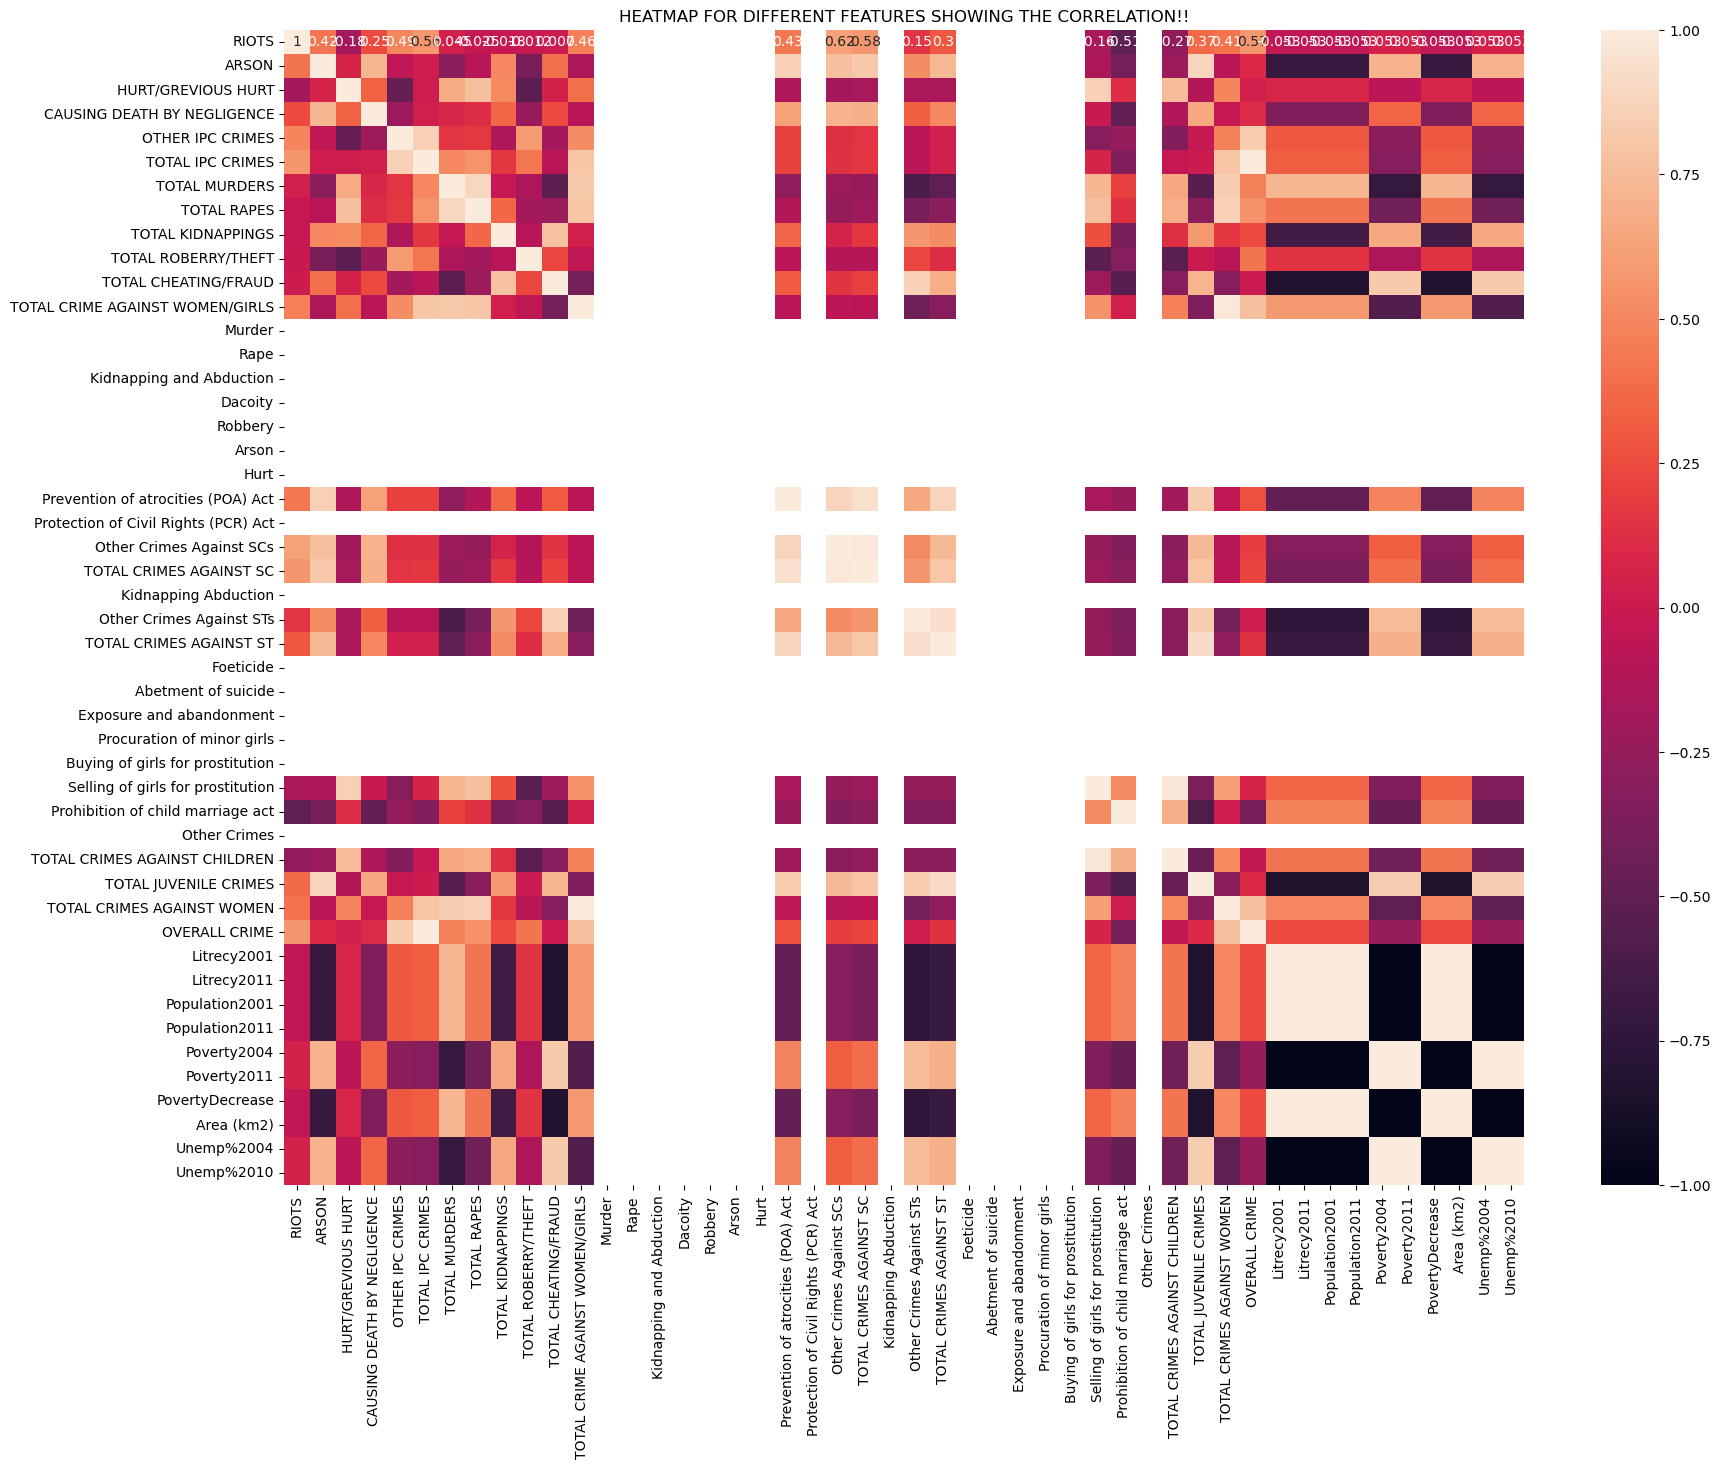

In [128]:
plt.figure(figsize=(20,15))
sns.heatmap(impact_sensitive_areas.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

From the above plot we can look at how different aspects like area,literacy,poverty,population and unemployment affect the crime rate 


## What needs to be done to reduce crime.

Mitigating criminal activities in India encompasses a sophisticated and multidimensional challenge that necessitates a synergistic approach involving diverse stakeholders such as governmental bodies, law enforcement entities, civil society organizations, and the citizenry at large. To curtail crime rates across the nation, the following stratagems may prove efficacious:

**Enhancement of Law Enforcement Capacities:** governmental authorities must augment resource allocation and funding towards law enforcement agencies to bolster their capabilities in crime prevention and investigation. Enacting police reforms to foster accountability, efficiency, and effectiveness within the force is crucial.

**Addressing Socio-economic Determinants:** Factors such as poverty, unemployment, and inadequate education significantly contribute to crime. Governmental interventions are required to ameliorate these conditions by creating employment opportunities, enhancing educational access, and providing essential services including water, electricity, and healthcare.

**Strengthening the Judicial System:** The prevailing judicial framework in India is characterized by delays and inefficiencies, potentially engendering public disillusionment. Initiatives aimed at streamlining judicial processes and enhancing responsiveness to societal needs are essential.

**Enhancing Public Awareness:** Elevating public consciousness regarding the repercussions of criminal activities and the criticality of crime reporting is fundamental. Awareness campaigns should be deployed to enlighten individuals about their legal rights and civic duties.

**Promoting Community Policing:** Fostering a collaborative relationship between law enforcement agencies and communities through community policing can significantly aid in crime prevention and resolution. Police forces should engage proactively with communities to discern and address localized concerns.

**Leveraging Technological Innovations:** The adoption of advanced technological solutions, including surveillance systems (e.g., CCTV cameras), unmanned aerial vehicles (drones), and digital forensic techniques, can play a pivotal role in the prevention and investigation of crimes.

**Reforming Correctional Facilities:** The current state of prisons in India, marked by overcrowding and substandard conditions, may contribute to the radicalization of detainees. Governmental efforts to refurbish these facilities and provide educational and vocational training to inmates are imperative.

Through the implementation of these strategies, it is possible to forge a comprehensive and effective framework for crime reduction in India, ultimately fostering a safer and more secure environment for all citizens.

## Capstone project overall story

India, with its vast and diverse populace exceeding 1.38 billion individuals, grapples with crime as a significant societal issue. Data from the National Crime Records Bureau (NCRB) for the year 2011 highlight that the nation witnessed approximately 2.27 million reported instances of criminal activity, marking a 4.54% reduction compared to the preceding year.

Particularly alarming are the instances of crimes against women, encompassing rape, sexual harassment, and domestic violence. The year 2011 saw 213,949 reported cases of such crimes, with 11.04% of these incidents involving rape or sexual assault. Despite the introduction of more stringent legal measures and heightened public consciousness, crimes against women persist as a deeply ingrained problem within Indian society.

Additionally, crimes against children, including rape, kidnapping, abduction, murder, trafficking, and importation of girls, represent significant areas of concern. The year 2011 recorded 33,049 cases of crimes against children, with 21.51% relating to rape or sexual assault and a staggering 46.24% pertaining to murder among the various crimes against children. Despite legislative enhancements and more rigorous law enforcement, there was a notable increase of 254.86% in crimes against children from 2001 to 2011. Madhya Pradesh, Uttar Pradesh, and Maharashtra emerged as the states with the highest incidence of such crimes.

The involvement of juveniles in criminal activities also poses a critical challenge, with evidence suggesting that this demographic is easily misled and prone to engaging in unlawful behavior. From 2001 to 2011, juvenile crime cases rose from 23,597 to 27,471, with Madhya Pradesh reporting the highest figures.

Violations of human rights by police forces constitute a significant portion of total crimes under the Indian Penal Code (IPC), with 2009 witnessing the highest number of such incidents. However, there was an 82.815% decline in these cases from 2001 to 2011, with Chhattisgarh reporting the highest number of violations.

Notably, law enforcement personnel themselves face risks of assault from riotous mobs, extremists, and during counter-insurgency or border operations. Uttar Pradesh and Jammu & Kashmir were among the states with a high incidence of such attacks on police or army personnel, although Jammu & Kashmir saw a substantial decrease in these incidents from 2001 to 2010.

Regarding crimes such as dacoity, robbery, burglary, and theft, Maharashtra, Madhya Pradesh, and Uttar Pradesh recorded the highest numbers, illustrating the prevalence of property-related crimes across these regions.

In summary, while there has been a slight decrease in the overall number of reported crimes, the data underscore persistent and significant challenges in combating crime in India. Continued governmental efforts to enhance law enforcement, elevate public awareness, and tackle socio-economic contributors to criminal behavior are essential for addressing these challenges effectively.